In [4]:
print

<function print>

In [5]:
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and reading CSV files
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
import re  # For regular expressions operations
from nltk.corpus import stopwords  # For removing stopwords from text data
from sklearn.preprocessing import LabelEncoder  # For encoding labels
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.neighbors import KNeighborsClassifier  # For the KNN classifier
from sklearn.metrics import accuracy_score  # For evaluating model accuracy


In [6]:
df = pd.read_csv('/Users/brejesh/Downloads/resume/UpdatedResumeDataSet.csv')

In [7]:
df.shape

(962, 2)

In [8]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [9]:
df.dtypes

Category    object
Resume      object
dtype: object

In [10]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [11]:
df.count()

Category    962
Resume      962
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [13]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [14]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


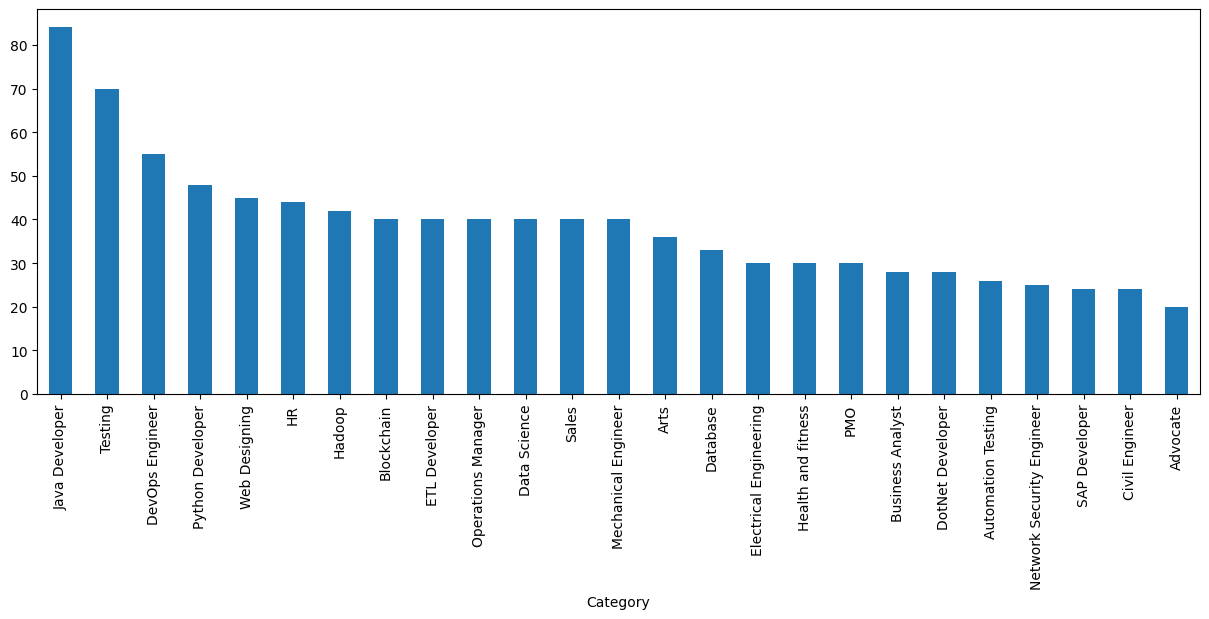

In [15]:
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart
df["Category"].value_counts().plot(kind="bar")

# Display the plot
plt.show()

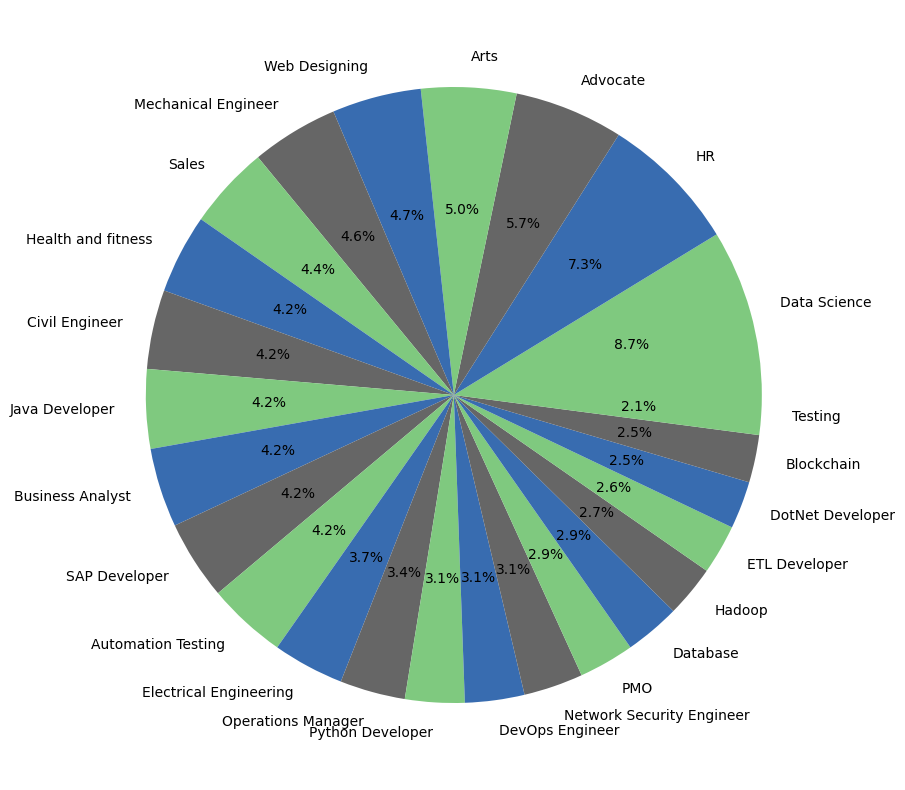

In [17]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

In [18]:
def clean(text):
    """
    Clean the input text by removing URLs, emails, special characters, and stop words.

    :param text: The string to be cleaned
    :return: The cleaned string
    """

    # Compile patterns for URLs and emails to speed up cleaning process
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

    # Remove URLs
    clean_text = url_pattern.sub('', text)

    # Remove emails
    clean_text = email_pattern.sub('', clean_text)

    # Remove special characters (keeping only words and whitespace)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)

    # Remove stop words by filtering the split words of the text
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)

    return clean_text

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brejesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
string = "Hello, $ % # I found this # article at https://www.example.com! You can contact me at john@example.com."
print(clean(string))

Hello found article contact


In [21]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [22]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))

In [23]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [24]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit the label encoder on the 'Category' column to learn the unique categories
le.fit(df["Category"])

# Transform the 'Category' column into encoded numerical values
df["Category"] = le.transform(df["Category"])

In [25]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [26]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit the TF-IDF vectorizer on the 'Resume' column to learn the vocabulary and IDF of the words
tfidf.fit(df["Resume"])

# Transform the 'Resume' texts into a sparse matrix of TF-IDF features
resume = tfidf.transform(df["Resume"])

In [27]:

X_train, X_test, y_train, y_test = train_test_split(resume, df["Category"], test_size=0.2, random_state=42)

In [28]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [29]:
X_train.shape, y_train.shape

((769, 8017), (769,))

In [30]:
# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# The accuracy is a float representing the proportion of correct predictions
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

Accuracy of the KNN classifier on test set: 0.98


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define a dictionary to hold models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    # Print the accuracy
    print(f'Accuracy of {model_name} on test set: {accuracy:.2f}')

Accuracy of KNeighborsClassifier on test set: 0.98
Accuracy of LogisticRegression on test set: 0.99
Accuracy of RandomForestClassifier on test set: 0.99
Accuracy of SVC on test set: 0.99
Accuracy of MultinomialNB on test set: 0.98


In [32]:
import joblib

# Save the trained KNN model
joblib.dump(clf, "knn_resume_classifier.joblib")
print("Model saved as knn_resume_classifier.joblib")


Model saved as knn_resume_classifier.joblib


In [33]:
joblib.dump(tfidf, "resume_vectorizer.joblib")


['resume_vectorizer.joblib']

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# The accuracy is a float representing the proportion of correct predictions
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

# ---- Save model and vectorizer ----
joblib.dump(clf, "knn_resume_classifier.joblib")
joblib.dump(tfidf, "resume_vectorizer.joblib")
print("Model and vectorizer saved successfully!")


Accuracy of the KNN classifier on test set: 0.98
Model and vectorizer saved successfully!


In [35]:
# Load model and vectorizer
clf = joblib.load("knn_resume_classifier.joblib")
vectorizer = joblib.load("resume_vectorizer.joblib")

# Predict for new resumes
new_resume = ["Experienced Python developer skilled in machine learning and cloud services."]
X_new = vectorizer.transform(new_resume)
pred = clf.predict(X_new)
print("Predicted domain:", pred[0])


Predicted domain: 6


In [38]:
import joblib
import pandas as pd

# Load the label encoder
le = joblib.load("label_encoder.joblib")

# Find the domain for label index 6
label_index = 6
domain_name = le.classes_[label_index]
print(f"Label {label_index} corresponds to domain: {domain_name}")

# Create a table of all label-to-domain mappings
mapping_df = pd.DataFrame({
    "Label Index": range(len(le.classes_)),
    "Domain": le.classes_
})

print(mapping_df)


Label 6 corresponds to domain: Data Science
    Label Index                     Domain
0             0                   Advocate
1             1                       Arts
2             2         Automation Testing
3             3                 Blockchain
4             4           Business Analyst
5             5             Civil Engineer
6             6               Data Science
7             7                   Database
8             8            DevOps Engineer
9             9           DotNet Developer
10           10              ETL Developer
11           11     Electrical Engineering
12           12                         HR
13           13                     Hadoop
14           14         Health and fitness
15           15             Java Developer
16           16        Mechanical Engineer
17           17  Network Security Engineer
18           18         Operations Manager
19           19                        PMO
20           20           Python Developer
21        

In [39]:
joblib.dump(le, "label_encoder.joblib")
print("Label encoder saved as label_encoder.joblib")

Label encoder saved as label_encoder.joblib
